# Данные:

# olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей

customer_id — позаказный идентификатор пользователя; 

customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта); 

customer_zip_code_prefix —  почтовый индекс пользователя; 

customer_city —  город доставки пользователя; 

customer_state —  штат доставки пользователя
 


# olist_orders_dataset.csv —  таблица заказов

order_id —  уникальный идентификатор заказа (номер чека); 

customer_id —  позаказный идентификатор пользователя; 

order_status —  статус заказа; 

order_purchase_timestamp —  время создания заказа; 

order_approved_at —  время подтверждения оплаты заказа; 

order_delivered_carrier_date —  время передачи заказа в логистическую службу; 

order_delivered_customer_date —  время доставки заказа; 

order_estimated_delivery_date —  обещанная дата доставки
 


# olist_order_items_dataset.csv —  товарные позиции, входящие в заказы

order_id —  уникальный идентификатор заказа (номер чека); 

order_item_id —  идентификатор товара внутри одного заказа; 

product_id —  ид товара (аналог штрихкода); 

seller_id — ид производителя товара; 

shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике; 

price —  цена за единицу товара; 

freight_value —  вес товара

In [ ]:
#импорт библиотек

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

%matplotlib inline 

In [93]:
#считывание данных

# таблица с уникальными идентификаторами пользователей
olist_customers_dataset = pd.read_csv(r"C:\Users\dniel\Desktop\Projects\First_e-com_project\olist_customers_dataset.csv")

# таблица заказов
olist_orders_dataset = pd.read_csv(r"C:\Users\dniel\Desktop\Projects\First_e-com_project\olist_orders_dataset.csv", 
                                  parse_dates = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                                                'order_delivered_customer_date', 'order_estimated_delivery_date']) 

#  товарные позиции, входящие в заказы
olist_order_items_dataset = pd.read_csv(r"C:\Users\dniel\Desktop\Projects\First_e-com_project\olist_order_items_dataset.csv")

# olist_customers_dataset

In [3]:
olist_customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
olist_customers_dataset.shape

(99441, 5)

In [5]:
olist_customers_dataset.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [6]:
olist_customers_dataset.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

# olist_orders_dataset

In [7]:
olist_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [8]:
olist_orders_dataset.shape

(99441, 8)

In [9]:
olist_orders_dataset.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [10]:
#посмотрим у каких статусов отсутствует подтверждение оплаты
olist_orders_dataset.query("order_approved_at == 'NaN'")['order_status'].value_counts()

canceled     141
delivered     14
created        5
Name: order_status, dtype: int64

In [11]:
olist_orders_dataset[['order_id', 'customer_id']].nunique()

order_id       99441
customer_id    99441
dtype: int64

# olist_order_items_dataset

In [12]:
olist_order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [13]:
olist_order_items_dataset.shape

(112650, 7)

In [14]:
olist_order_items_dataset.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [15]:
olist_order_items_dataset.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [16]:
olist_order_items_dataset.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

# 1. Найти число пользователей, которые совершили покупку только 1 раз 
- 93049 пользователей

Посмотрим на статусы заказов, по которым есть дата подверждения оплаты.  

In [94]:
purchases = olist_orders_dataset.query("order_approved_at != 'NaN'")
purchases.order_status.value_counts()

delivered      96464
shipped         1107
unavailable      609
canceled         484
invoiced         314
processing       301
approved           2
Name: order_status, dtype: int64

Думаю, что нужно считать в качестве покупки все заказы, по которым есть подтверждение оплаты, т.к. здесь важен в первую очередь сам факт покупки. А уже после совершения покупки заказ может быть отменен клиентом, потому что он передумал, или товар потерялся при доставке или не обнаружен на складе. Но тем не менее, это все уже идет после оплаты заказа. 

In [95]:
#объединим датафрейм с покупками с датафреймом с данными о покупателях
purchases_with_custom = purchases.merge(olist_customers_dataset, how = 'left', on = 'customer_id')

In [96]:
purchases_with_custom.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [97]:
purchases.shape

(99281, 8)

In [98]:
purchases.nunique()

order_id                         99281
customer_id                      99281
order_status                         7
order_purchase_timestamp         98720
order_approved_at                90733
order_delivered_carrier_date     81006
order_delivered_customer_date    95650
order_estimated_delivery_date      453
dtype: int64

In [99]:
purchases_with_custom.shape

(99281, 12)

Cгрупируем по уникальным id пользователей и посчитаем количество покупок у каждого пользователя. 
Найдем пользователей, которые совершили только одну покупку

In [100]:
customers_one_purchases = purchases_with_custom.groupby('customer_unique_id', as_index=False)\
                    .agg({'order_id': 'count'})\
                    .rename(columns={'order_id':'count_order'})
customers_one_purchases.count_order.value_counts()

1     93049
2      2708
3       191
4        30
5         8
6         6
7         3
9         1
17        1
Name: count_order, dtype: int64

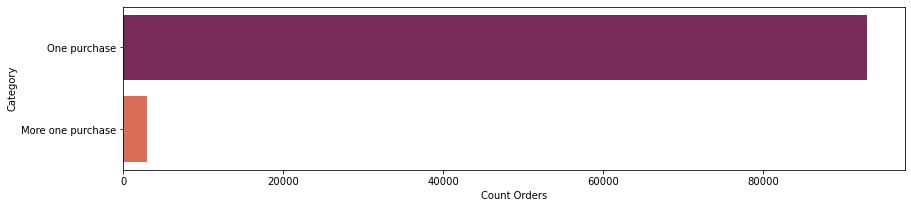

In [101]:
plt.figure(figsize=(14,3))
plt.xlabel('Count Orders')
plt.ylabel('Category')
y = ['One purchase', 'More one purchase']
x= [customers_one_purchases[(customers_one_purchases.count_order == 1)].customer_unique_id.count(),
    customers_one_purchases[(customers_one_purchases.count_order >1)].customer_unique_id.count()]

ax = sns.barplot(y=y,x=x, palette='rocket')

# 2. Найти среднее количество заказов в месяц, которые не доставляются по разным причинам


In [102]:
#оставим заказы, у которых отсутствует дата доставки и посмотрим на статусы заказов
not_delivered = olist_orders_dataset[olist_orders_dataset.order_delivered_customer_date.isnull()]  
not_delivered['order_status'].value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

можно выделить две основные причины, по которым заказы не доставляются - либо товар недоступен, либо заказ отменен. Остальные статусы не берем, потому что они являются промежуточными и пока не понятно, будет товар доставлен или нет. Также сюда попал статуc delivered, возможно, это баг. Также исключаем его. 

In [103]:
#оставим заказы со статусами canceled и unavailable
not_delivered = olist_orders_dataset.query("order_status == 'canceled' or order_status == 'unavailable'")     

In [104]:
not_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05


In [105]:
not_delivered['order_status'].value_counts()

canceled       625
unavailable    609
Name: order_status, dtype: int64

In [106]:
# создадим доп.колонку с месяце и годом планируемой даты доставки 
not_delivered['year_month'] = not_delivered['order_estimated_delivery_date'].dt.to_period('M')

C:\Users\dniel\AppData\Local\Temp/ipykernel_11060/487665155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_delivered['year_month'] = not_delivered['order_estimated_delivery_date'].dt.to_period('M')


In [107]:
#общее среднее количество заказов, недоставленных в месяц
general_mean = not_delivered.groupby('year_month', as_index = False).agg({'order_id': 'count'}).order_id.mean()
general_mean

47.46153846153846

In [108]:
#количество заказов, которые не доставляются по причине отмены заказа или недоступности товара, по месяцам :
mean_not_delivered = not_delivered.groupby(['order_status', 'year_month'], as_index = False).agg({'order_id': 'count'})\
                                  .pivot(index = 'year_month', columns = 'order_status', values = 'order_id')\
                                  .fillna(0)

In [109]:
mean_not_delivered

order_status,canceled,unavailable
year_month,,
2016-09,1.0,0.0
2016-10,3.0,0.0
2016-11,14.0,5.0
2016-12,8.0,2.0
2017-02,2.0,2.0
2017-03,26.0,66.0
2017-04,22.0,19.0
2017-05,23.0,16.0
2017-06,29.0,29.0


In [110]:
#среднее количество заказов в месяц, которые не доставляются по причине отмены заказа или недоступности товара
mean_not_delivered.mean()

order_status
canceled       24.038462
unavailable    23.423077
dtype: float64

# 3.Определить день недели, в который каждый товар покупался чаще всего

In [132]:
#объединим датафрейм с покупками из первого задания с датафреймом с продукцией
items_with_orders = olist_order_items_dataset.merge(purchases, on = 'order_id')

In [133]:
items_with_orders.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [134]:
items_with_orders.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
dtype: int64

In [135]:
#создадим колонку с названием дня недели, когда была совершена покупка
items_with_orders['day_of_the_week'] = items_with_orders.order_purchase_timestamp.dt.day_name()

In [147]:
#найдем дни, в которые товар чаще всего покупается
products_max = items_with_orders.groupby(["product_id"])['day_of_the_week'].agg(pd.Series.mode).to_frame().reset_index()

products_max.head(20)


,product_id,day_of_the_week
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Thursday
3,000b8f95fcb9e0096488278317764d19,"[Friday, Wednesday]"
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday
5,0011c512eb256aa0dbbb544d8dffcf6e,Thursday
6,00126f27c813603687e6ce486d909d01,Sunday
7,001795ec6f1b187d37335e1c4704762e,Saturday
8,001b237c0e9bb435f2e54071129237e9,Thursday
9,001b72dfd63e9833e8c02742adf472e3,Wednesday


Видно, что у некоторых продуктов есть несколько популярных дней продажи. Это связано с маленьким числом покупок данного товара. Данные товары были куплены по одному разу в разные дни. 

<AxesSubplot:xlabel='day_of_the_week', ylabel='purchase_count'>

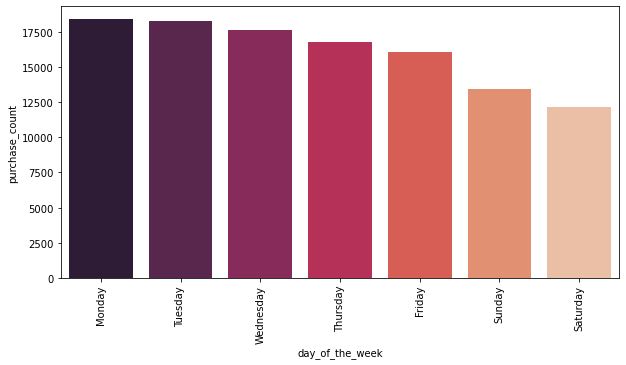

In [163]:
# Дополнительно для наглядности построим график количества покупок в каждый из дней 
plt.figure(figsize=(10,5))
new = items_with_orders.groupby('day_of_the_week', as_index=False) \
               .agg({'order_id': 'count'})\
               .sort_values('order_id', ascending = False)\
               .rename(columns = {'order_id': 'purchase_count'})
plt.xticks(rotation='vertical')
sns.barplot(x = 'day_of_the_week',  y = 'purchase_count', data = new, palette="rocket")

# 4.Определить среднее количество покупок в неделю у каждого пользователя (в распределении по месяцам) 

In [164]:
#возьмем объединенную таблицу успешных покупок и инофрмацией по покупателям из первого задания 
purchases_with_custom.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [165]:
#создадим колонку с  месяцем
purchases_with_custom['month'] = purchases_with_custom.order_purchase_timestamp.dt.to_period('M')

In [166]:
#сгруппируем по пользователям и месяцу, и посчитаем количество заказов
purchases_in_month = purchases_with_custom.groupby(['customer_unique_id', 'month'], as_index=False)\
                             .agg({'order_id': 'count'})\
                             .rename(columns = {'order_id': 'purchases'})

In [168]:
# добавим колонку с количеством недель в месяце
purchases_in_month['days_in_week'] = purchases_in_month.month.dt.daysinmonth /7

In [169]:
#добавим колонку с количеством заказов в неделю(по месяцам) по каждому пользователю
purchases_in_month['purchases_in_week'] = purchases_in_month.purchases/purchases_in_month.days_in_week

In [170]:
#результирующая таблица
purchases_in_month = purchases_in_month.sort_values('purchases_in_week', ascending = False)
purchases_in_month.head()

,customer_unique_id,month,purchases,days_in_week,purchases_in_week
7315,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,6,4.428571,1.354839
69304,b4e4f24de1e8725b74e4a1f4975116ed,2018-02,4,4.000000,1.000000
23911,3e43e6105506432c953e165fb2acf44c,2018-02,4,4.000000,1.000000
62116,a239b8e2fbce33780f1f1912e2ee5275,2017-02,4,4.000000,1.000000
67667,b08fab27d47a1eb6deda07bfd965ad43,2017-09,4,4.285714,0.933333


# 5. Провести когортный анализ пользователей в период с января по декабрь

In [172]:
# из таблицы с покупками, объединенной с клиентами оставим колонки с customer_unique_id и order_approved_at
cohort_analysis = purchases_with_custom[['customer_unique_id','order_purchase_timestamp']] 
# определим месяц и год, когда была совершена покупка
cohort_analysis['purchase_period'] = cohort_analysis.order_purchase_timestamp.dt.to_period('M')

C:\Users\dniel\AppData\Local\Temp/ipykernel_11060/1329565160.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_analysis['purchase_period'] = cohort_analysis.order_purchase_timestamp.dt.to_period('M')


In [173]:
#оставим данные только за 2017 год, т.к он содержит данные за весь период с января по декабрь
cohort_analysis = cohort_analysis.query("purchase_period >= '2017-01' & purchase_period < '2018-01'")

In [174]:
# определим месяц первой покупки у каждого пользователя
first_purchase = cohort_analysis.groupby('customer_unique_id', as_index=False)\
               .agg({'purchase_period': 'min'})\
               .rename(columns = {'purchase_period': 'cohort'})

In [175]:
# объединим датафреймы
cohort_analysis = cohort_analysis.merge(first_purchase, how = 'left', on = 'customer_unique_id')

In [176]:
cohort_analysis.head()

,customer_unique_id,order_purchase_timestamp,purchase_period,cohort
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10,2017-09
1,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2017-11,2017-11
2,80bb27c7c16e8f973207a5086ab329e2,2017-07-09 21:57:05,2017-07,2017-07
3,36edbb3fb164b1f16485364b6fb04c73,2017-04-11 12:22:08,2017-04,2017-04
4,932afa1e708222e5821dac9cd5db4cae,2017-05-16 13:10:30,2017-05,2017-05


In [177]:
#найдем количество пользователей, которые совершали покупки по месяцам
cohort_analysis = cohort_analysis.groupby(['cohort', 'purchase_period'], as_index=False)\
               .agg({'customer_unique_id': 'nunique'})\
               .rename(columns = {'customer_unique_id': 'total_customers'})              

In [178]:
cohort_analysis.head()

,cohort,purchase_period,total_customers
0,2017-01,2017-01,763
1,2017-01,2017-02,3
2,2017-01,2017-03,2
3,2017-01,2017-04,1
4,2017-01,2017-05,3


In [179]:
#индексы для создания когорт
cohort_analysis['month'] = (cohort_analysis['purchase_period'].dt.month - cohort_analysis['cohort'].dt.month)

In [180]:
#собираем сводную 
cohort_analysis = cohort_analysis.pivot(index = 'cohort', columns = 'month', values = 'total_customers')

In [181]:
cohort_analysis

month,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-01,763.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,NaN,3.0,1.0
2017-02,1738.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,4.0,2.0,NaN
2017-03,2634.0,13.0,9.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,NaN,NaN
2017-04,2349.0,14.0,5.0,4.0,8.0,6.0,8.0,7.0,7.0,NaN,NaN,NaN
2017-05,3590.0,17.0,18.0,14.0,11.0,12.0,15.0,6.0,NaN,NaN,NaN,NaN
2017-06,3138.0,15.0,11.0,13.0,8.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN
2017-07,3890.0,20.0,14.0,10.0,11.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,4181.0,28.0,14.0,11.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4128.0,28.0,22.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
#посчитаем retention
cohort_sizes = cohort_analysis.iloc[:,0]
retention_cohort = cohort_analysis.div(cohort_sizes, axis = 0)

In [183]:
cohort_sizes

cohort
2017-01     763.0
2017-02    1738.0
2017-03    2634.0
2017-04    2349.0
2017-05    3590.0
2017-06    3138.0
2017-07    3890.0
2017-08    4181.0
2017-09    4128.0
2017-10    4467.0
2017-11    7298.0
2017-12    5482.0
Freq: M, Name: 0, dtype: float64

In [184]:
retention_cohort

month,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-01,1.0,0.003932,0.002621,0.001311,0.003932,0.001311,0.005242,0.001311,0.001311,NaN,0.003932,0.001311
2017-02,1.0,0.002301,0.002877,0.001151,0.004028,0.001151,0.002301,0.001726,0.001151,0.002301,0.001151,NaN
2017-03,1.0,0.004935,0.003417,0.003797,0.003417,0.001519,0.001519,0.003037,0.003417,0.000759,NaN,NaN
2017-04,1.0,0.005960,0.002129,0.001703,0.003406,0.002554,0.003406,0.002980,0.002980,NaN,NaN,NaN
2017-05,1.0,0.004735,0.005014,0.003900,0.003064,0.003343,0.004178,0.001671,NaN,NaN,NaN,NaN
2017-06,1.0,0.004780,0.003505,0.004143,0.002549,0.003824,0.003824,NaN,NaN,NaN,NaN,NaN
2017-07,1.0,0.005141,0.003599,0.002571,0.002828,0.002057,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.006697,0.003348,0.002631,0.003588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.006783,0.005329,0.002907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Cohorts: Retention by month'}, xlabel='month', ylabel='cohort'>

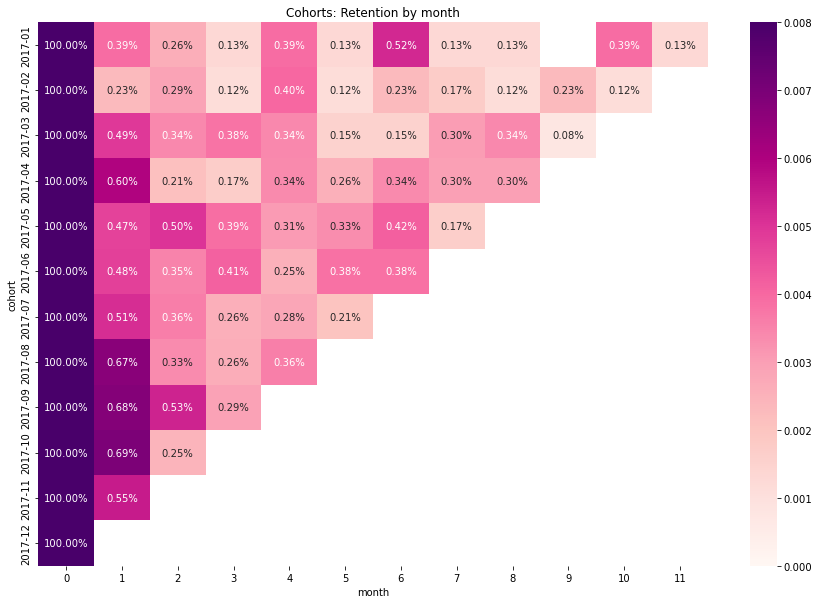

In [185]:
plt.figure(figsize=(15, 10))
plt.title('Cohorts: Retention by month')
sns.heatmap(retention_cohort, annot = True, fmt = '.2%', vmin=0, vmax=0.008, center=0.004, cmap = 'RdPu')

самый высокий retention за 3-ий месяц составляет 0.41% и наблюдается у пользователей,которые совершили первую покупку в июне (2017-06) 

# 6. Построить RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. 

R - время от последней покупки пользователя до текущей даты
F - суммарное количество покупок у пользователя за всё время
M - сумма покупок за всё время. 


In [206]:
# объединим датафрейм с покупками и пользователями с датафреймом и описанием товарных позиций, оставим данные за полный год
full_df = purchases_with_custom.merge(olist_order_items_dataset, how = 'left', on = 'order_id')
                                       
full_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [207]:
# за текущую дату возьмем самую последнюю дату покупки + 1 день
current_date = full_df.order_approved_at.max()+timedelta(days=1)

In [208]:
RFM = full_df.groupby(['customer_unique_id', 'order_id', 'order_approved_at'], as_index = False)\
             .agg({'price':'sum'}) 
#количество дней с момента оплаты заказа до текущей даты.
RFM['period_before_current'] = (current_date - RFM.order_approved_at).dt.days


In [209]:
RFM.head()

,customer_unique_id,order_id,order_approved_at,price,period_before_current
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10 11:11:18,129.90,117
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,2018-05-07 18:25:44,18.90,119
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-03-10 21:05:03,69.00,542
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10-12 20:49:17,25.99,326
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-14 20:06:52,180.00,293


In [210]:
# recency, frequency, monetary 
RFM = RFM.groupby('customer_unique_id', as_index=False)\
         .agg({'period_before_current': 'min', 'order_id': 'count', 'price': 'sum'})\
         .rename(columns = {'period_before_current': 'recency', 'order_id': 'frequency', 'price': 'monetary'})    

In [211]:
RFM.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00


Text(0.5, 1.0, 'Recency')

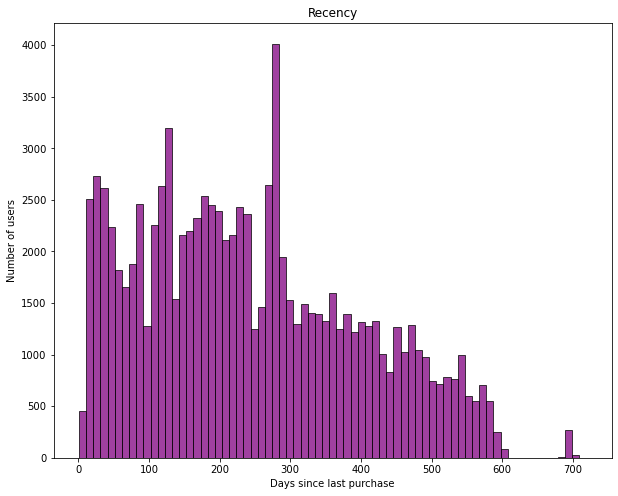

In [212]:
# распределение recency
plt.figure(figsize = (10, 8))
sns.histplot(RFM.recency, color="purple")
plt.xlabel('Days since last purchase')
plt.ylabel('Number of users')
plt.title('Recency')


In [213]:
#разделим пользователей по квантилям на три группы 
q_1, q_2 = RFM.recency.quantile([0.33, 0.66])

In [214]:
q_1, q_2

(153.0, 293.0)

In [215]:
def recency_score(x):
    if x < q_1:
        return 3
    elif q_1 <= x and x < q_2:
        return 2
    else:
        return 1

Text(0.5, 1.0, 'Frequency')

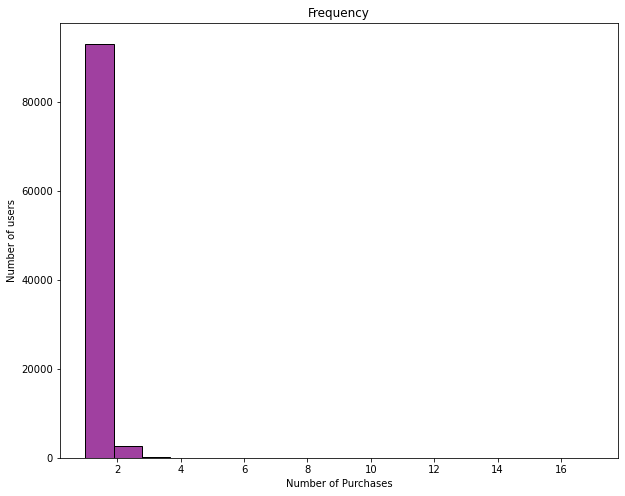

In [216]:
# распределение frequency
plt.figure(figsize = (10, 8))
sns.histplot(RFM.frequency, color="purple")
plt.xlabel('Number of Purchases')
plt.ylabel('Number of users')
plt.title('Frequency')

In [217]:
def frequency_score(x):
    if x == 1:
        return 1
    elif  x == 2:
        return 2
    else:
        return 3

в этом случае, лучше не использовать деление по квантилям. поделим просто на три группы: 1 группа - покупает редко (1 заказ)
    2 группа - покупает нечасто (2 заказа), 3 группа - покупает часто (более 2 заказов)

Text(0.5, 1.0, 'Monetary')

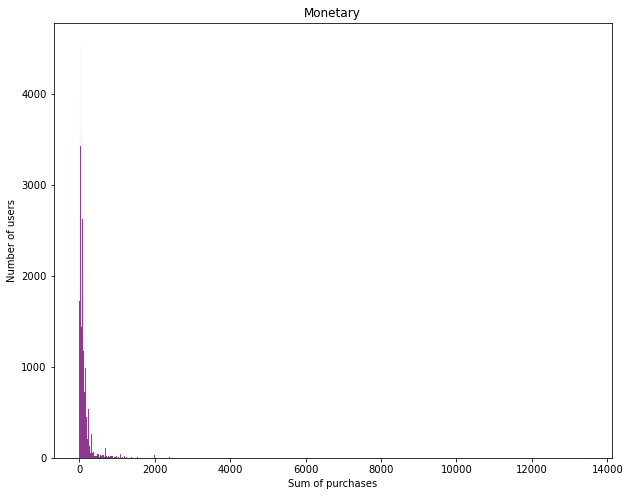

In [218]:
# распределение monetary
plt.figure(figsize = (10, 8))
sns.histplot(RFM.monetary, color="purple")
plt.xlabel('Sum of purchases')
plt.ylabel('Number of users')
plt.title('Monetary')

In [219]:
q_1m, q_2m = RFM.monetary.quantile([0.33, 0.66])

In [220]:
q_1m, q_2m

(56.99, 124.9)

In [221]:
def monetary_score(x):
    if x < q_1m:
        return 1
    elif q_1m <= x and x < q_2m:
        return 2
    else:
        return 3

In [222]:
#присвоим ранги
RFM['R'] = RFM.recency.apply(recency_score)
RFM['F'] = RFM.frequency.apply(frequency_score)
RFM['M'] = RFM.monetary.apply(monetary_score)
RFM['RFM_score'] = RFM.R.astype(str) + RFM.F.astype(str) + RFM.M.astype(str)

In [223]:
RFM.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,3,1,3,313
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,3,1,1,311
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,1,1,1,111
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,1,1,3,113


Recency: 1 группа - покупали давно (от 177 дней), 2 группа - относительно недавние (от 72 до 177), 3 группа - покупали недавно (до 72 дней)

Frequency: 1 группа - покупает редко (1 заказ) 2 группа - покупает нечасто (2 заказа), 3 группа - покупает часто (более 2 заказов)

Monetary: 1 группа - низкая сумма чека (до 57 у.е.), 2 группа - средняя сумма чека (от 57 до 120 у.е.), 3 группа - высокая сумма чека (от 120 у.е.)

Text(0.5, 1.0, 'RFM-segments')

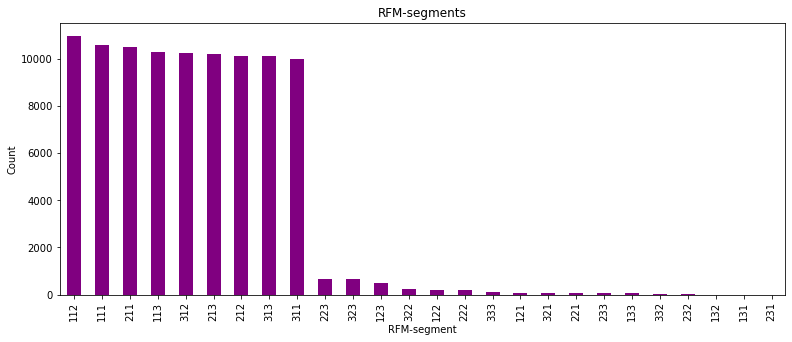

In [224]:
plt.figure(figsize = (13, 5))
RFM.RFM_score.value_counts().plot.bar(color ="purple")
plt.xlabel('RFM-segment')
plt.ylabel('Count')
plt.title('RFM-segments')

In [225]:
#категории
segt_map = {
    r'1[1-2]': 'потерянные',
    r'21': 'риск оттока',
    r'13': 'бывшие лояльные',
    r'2[2-3]': 'спящие',
    r'3[1-2]': 'перспективные',
    r'33': 'лояльные'
}

RFM['Segment'] = RFM['R'].map(str) + RFM['F'].map(str)
RFM['Segment'] = RFM['Segment'].replace(segt_map, regex=True)
RFM.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,3,1,3,313,перспективные
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,3,1,1,311,перспективные
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112,потерянные
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,1,1,1,111,потерянные
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,1,1,3,113,потерянные


1. Потерянные - покупок мало и сделаны давно. 
2. Риск оттока - покупку совершили отнсительно недавно, но мало, можно потерять.
3. Бывшие лояльные - покупок много, но сделаны очень давно.
4. Спящие - покупки сделаны относительно недавно, 2 и более покупки
5. Перспективные - Покупки сделаны недавно.
6. Лояльные - много покупок, последняя недавно. 

D:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Segment', ylabel='count'>

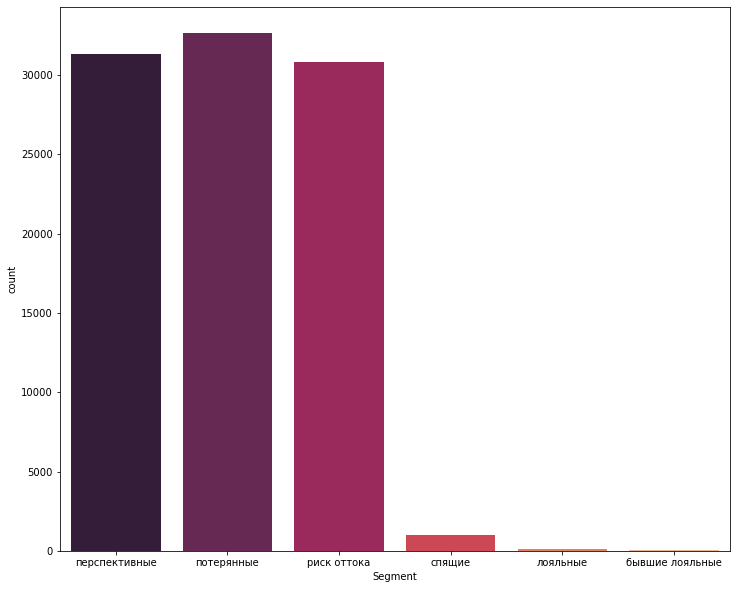

In [226]:
plt.figure(figsize = (12, 10))
sns.countplot(RFM.Segment, palette = 'rocket')

выделяются три большие категории: потерянные, находящиеся под риском оттока и перспективные. 

Очень мало лояльных клиентов. 

Возможно,не проводится достаточной работы с перспективными клиентами для перевода их в категорию лояльных. Можно устраивать опросы, собирать информацию об интересах, об уровне удовлетворенности сервисом, предалагать акции, скидки, бонусы,обучающие ролики и т.д.  

Тем, кто находится под риском ухода можно поинтересоваться по какой причине, они так долго ничего не покупают, постараться их заинтересовать скидкой или купоном на покупку; отправить подборки товаров, полезные статьи.

Также нужно попробовать реанимировать потерянных клиентов. 
